In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from framework_pkg.framework import FrameWork
from framework_pkg.survival_probablity import ULDM, MSW

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0., 
        'mu3'  : 0.  ,
        'mdm'  : 5e-2 , 
        'alpha': 0.  ,
        'eps' : 0.  ,
        'alpha_eps' : 0.  ,
        'M12'  : 6.9e-5 }


frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                    )

msw_signal_fraction = frame_predicted_total_signal.__getitem__(param) 

data = np.loadtxt('./Data/modulation_data.txt')


Warning!: Python module pyslha not found, disabling slha reading routines


In [2]:
param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0.02, 
        'mu3'  : 0.  ,
        'mdm'  : 1.089e-3 , 
        'alpha': np.pi/2  ,
        'eps' : 0.5  ,
        'alpha_eps' : np.pi  ,
        'M12'  : 6.9e-5 }
ULDM_signal_fraction = frame_predicted_total_signal.__getitem__(param) 

In [3]:
time_bins = np.unique(frame_predicted_total_signal.time_weights[:,0])
bin_prediction_msw = np.zeros((len(time_bins),2))
bin_prediction_uldm = np.zeros((len(time_bins),2))

for i in range(len(time_bins)):
    cond = frame_predicted_total_signal.time_weights[:,0] == time_bins[i]
    T_k = np.sum(frame_predicted_total_signal.time_weights[cond,2:],axis=1)
    bin_prediction_msw[i,1] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[cond])
    bin_prediction_msw[i,0] = data[i,0]
    bin_prediction_uldm[i,1] = (1/np.sum(T_k)) * np.sum(T_k * ULDM_signal_fraction[cond])
    bin_prediction_uldm[i,0] = data[i,0]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
print(np.mean(data[:,1]))

2.3586098654708523


<ErrorbarContainer object of 3 artists>

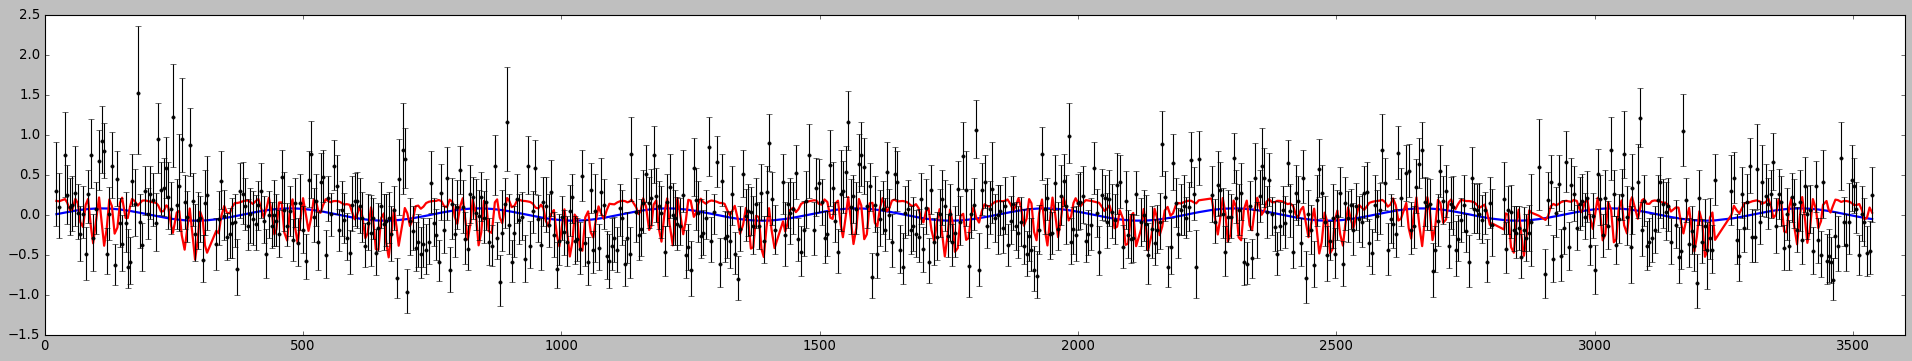

In [ ]:
plt.figure(figsize=(30,5))
plt.xlim(0,3600)
#plt.ylim(-0.5,0.5)

#plt.plot(frame_predicted_total_signal.time_weights[:,1], msw_signal_fraction, '-')
#plt.plot(frame_predicted_total_signal.time_weights[:,1], ULDM_signal_fraction, '-')

plt.plot(bin_prediction_msw[:,0], bin_prediction_msw[:,1],lw=2,ls='-',color='b')


plt.plot(bin_prediction_uldm[:,0], bin_prediction_uldm[:,1], lw=2,ls='-',color='r')


plt.errorbar(data[:,0], data[:,1] - np.mean(data[:,1]), np.array((data[:,3],data[:,2])), fmt='k.')

<ErrorbarContainer object of 3 artists>

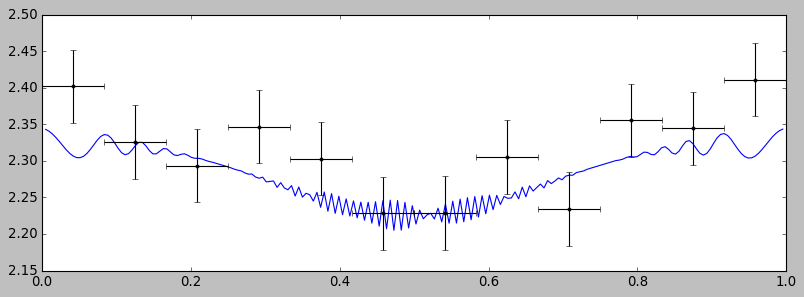

In [18]:
plt.figure(figsize=(12,4))
plt.xlim(0,1)


plt.plot(frame_predicted_total_signal.day, 1e4 * frame_predicted_total_signal.SNO_norm * np.mean(predicted_total_signal,axis=(1,2)), 'b-')

plt.errorbar(annual_data[:,0], annual_data[:,1], 0.05 * np.ones(12), 0.5*(annual_data[1,0] - annual_data[0,0])*np.ones(12) , fmt='k.')